# The Machine Leaning Company Fellowship task

Problem statement (Multiclass Image Classification)-

Train any neural network of your choice on 102 flowers dataset. Prepare an in-depth notebook on the same. Explain each and every step in suitable words. Unique approach will carry more marks.

## The data

The training data, as provided in the mail, is available in `./oxford-102-flowers/train.txt` file.

The cross-validation data, as provided in the mail, is available in `./oxford-102-flowers/valid.txt` file.

The testing data, as provided in the mail, is available in `./oxford-102-flowers/train.txt` file.

## A brief summary

We will be exploring convulation neural networks in this notebook. The networks will consist of some convulation layers, followed by max pooling layers which will be fully connected to an artificial neural network layer.



## Starting up

We start by importing all the necessary modules and making sure that `tensorflow` uses GPU.

In [1]:
import cv2
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

# using GPU
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

## Reading the text files

Next we read the text files and extract the data in a python readable format.

In [2]:
def read_file_for_data(path):
    """
    Reads a text file and returns the data with corresponding image path and label.
    
    Parameters
    ----------
    path : str
        Path of the text file.
        
    Returns
    -------
    data : list
        Extracted data of the form -
        [
            ['path/to/image/1', 'label'],
            ['path/to/image/2', 'label'],
            ['path/to/image/3', 'label']
        ]
    """
    with open(path) as f:
        text = f.readlines()
        text = [line.replace("\n", "") for line in text]
        data = np.array([line.split() for line in text])
    return data

Now we extract all the data one by one. Here I decided to exchange train and test data as the test data had around 6100 entries whereas the train data had only around 1000 entries. I did try using the train dataset for training but due to the low amount of data points, the model was performing very poorly.


In [3]:
test_dataset = read_file_for_data("./oxford-102-flowers/train.txt")
test_dataset[:5]

array([['jpg/image_03860.jpg', '16'],
       ['jpg/image_06092.jpg', '13'],
       ['jpg/image_02400.jpg', '42'],
       ['jpg/image_02852.jpg', '55'],
       ['jpg/image_07710.jpg', '96']], dtype='<U19')

In [4]:
cross_valid_dataset = read_file_for_data("./oxford-102-flowers/valid.txt")
cross_valid_dataset[:5]

array([['jpg/image_04467.jpg', '89'],
       ['jpg/image_07129.jpg', '44'],
       ['jpg/image_05166.jpg', '4'],
       ['jpg/image_07002.jpg', '34'],
       ['jpg/image_02007.jpg', '79']], dtype='<U19')

In [5]:
train_dataset = read_file_for_data("./oxford-102-flowers/test.txt")
train_dataset[:5]

array([['jpg/image_06977.jpg', '34'],
       ['jpg/image_00800.jpg', '80'],
       ['jpg/image_05038.jpg', '58'],
       ['jpg/image_06759.jpg', '0'],
       ['jpg/image_01133.jpg', '45']], dtype='<U19')

## Pre-processing the data

Now we have the data, but not in an ideal format. We would like to have something like this -
```py
features = [
    numpy_image_1,
    numpy_image_2
    .
    .
]

labels = [
    label1,
    label2
    .
    .
]
```

To achieve this, we process the list of dataset obtained above using a function -
1. For the images, we will read a single image as a numpy array, resize it, and then will normalise the features.
2. For the labels, we will convert the `str` labels to `int` type.

In [6]:
def generate_features_and_labels(dataset):
    """
    Generates features and labels from a list of data.
    
    Parameters
    ----------
    dataset : list
        Of the form -
        [
            ['path/to/image/1', 'label'],
            ['path/to/image/2', 'label'],
            ['path/to/image/3', 'label']
        ]
        
    Returns
    -------
        features : np.ndarray
            Of the form -
                [
                    numpy_image_1,
                    numpy_image_2
                    .
                    .
                ]
        labels : np.ndarray
            Of the form -
                [
                    label1,
                    label2
                    .
                    .
                ]
         
    """
    
    # extract all the image paths
    images = np.array(dataset[:, 0])
    features = []

    # loop through the image paths
    for image in images:
        
        # read an image as a numpy array
        img = cv2.imread(f"./oxford-102-flowers/{image}")
        #resize the image into 64X64
        img = cv2.resize(img, (64, 64))
        # append the image
        features.append(img)

    # convert features to a numpy array
    features = np.array(features)
    # normalise features
    features = features / 255.0
    
    # taking labels from the dataset
    labels = np.array([int(x) for x in dataset[:, 1]])

    return features, labels

Now we are ready to generate the features and the corresponding labels. For the training dataset we do this in parts, as my laptop was not able to process more than 1000 images in a single loop or in a nested loop.

### Training dataset

In [7]:
x_train, y_train = generate_features_and_labels(train_dataset[:1000])

In [8]:
x, y = generate_features_and_labels(train_dataset[1000:2000])
x_train = np.concatenate((x_train, x))
y_train = np.concatenate((y_train, y))

In [9]:
x, y = generate_features_and_labels(train_dataset[2000:3000])
x_train = np.concatenate((x_train, x))
y_train = np.concatenate((y_train, y))

In [10]:
x, y = generate_features_and_labels(train_dataset[3000:4000])
x_train = np.concatenate((x_train, x))
y_train = np.concatenate((y_train, y))

In [11]:
x, y = generate_features_and_labels(train_dataset[4000:5000])
x_train = np.concatenate((x_train, x))
y_train = np.concatenate((y_train, y))

In [12]:
x, y = generate_features_and_labels(train_dataset[5000:6000])
x_train = np.concatenate((x_train, x))
y_train = np.concatenate((y_train, y))

In [13]:
x, y = generate_features_and_labels(train_dataset[6000:])
x_train = np.concatenate((x_train, x))
y_train = np.concatenate((y_train, y))

### Visualising the training dataset

One can see that the training dataset is not uniform.

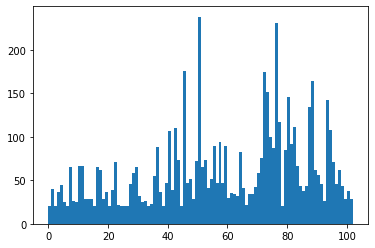

In [14]:
plt.hist(y_train, bins=[x for x in range(0, 103)])
plt.show()

### Testing dataset

In [15]:
x_test, y_test = generate_features_and_labels(test_dataset)

### Visualising testing dataset

The testing dataset is uniform.

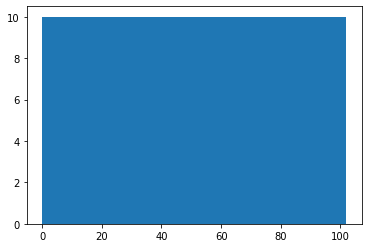

In [16]:
plt.hist(y_test, bins=[x for x in range(0, 103)])
plt.show()

### Cross-validation dataset

In [17]:
x_cross_valid, y_cross_valid = generate_features_and_labels(cross_valid_dataset)

### Visualising Cross-validation dataset

The cross-validation dataset is uniform.

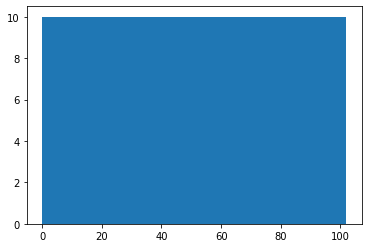

In [18]:
plt.hist(y_cross_valid, bins=[x for x in range(0, 103)])
plt.show()

Looking at an image from the normalised training dataset.

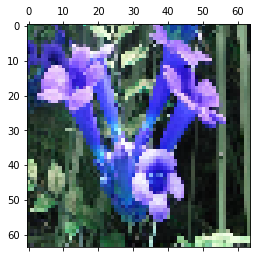

In [19]:
plt.matshow(x_train[5])

In [20]:
len(x_train), len(x_test), len(x_cross_valid)

(6149, 1020, 1020)

## Building the first model

We now have the data that our model will be training on, so we can proceed ahead to build a quick and a dirty model on which we will be working on throughout this notebook.

1. For the first model, let us take 3 convulation layers, each followed by a max pooling layer, with a fully connected layer of neurons at the end of the convulation structure.
2. For all the layers, we will be using the `relu` activation function and for the output layer, we will be using the `softmax` activation function.
3. We will also be using the `same` padding to keep the dimensions of the image same throughout the convulation layers, and to also include the pixels at edge in more convulation operations.

In [21]:
dirty_model = Sequential([
    # a convulation layer with 8 3X3 filters, relu activation and same padding followed by a max pooling layer
    layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(),
    
    # a convulation layer with 8 3X3 filters, relu activation and same padding followed by a max pooling layer
    layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(),
    
    # a convulation layer with 8 3X3 filters, relu activation and same padding followed by a max pooling layer
    layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(),
    
    # flattening the obtained array for ANN
    layers.Flatten(),
    
    # a dense neural network layer with 256 neurons and relu activation
    layers.Dense(256, activation='relu'),
    
    # a dense output layer with 102 neurons (for 102 classes) and softmax activation
    layers.Dense(102, activation="softmax")
])

Let us compile our dirty model with `adam` optimizer, `SparseCategoricalCrossentropy` loss function (as our labels are not one hot encoded) and "accuracy" as a metric.

In [22]:
dirty_model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

Now let us try to fit our training data and let us run it for 100 epochs with a batch size of 100.

In [23]:
dirty_model.fit(x_train, y_train, epochs=100, batch_size=100)

Epoch 1/100
62/62 [==============================] - 7s 17ms/step - loss: 4.4231 - accuracy: 0.0481
Epoch 2/100
62/62 [==============================] - 1s 15ms/step - loss: 3.9253 - accuracy: 0.1078
Epoch 3/100
62/62 [==============================] - 1s 15ms/step - loss: 3.3245 - accuracy: 0.1969
Epoch 4/100
62/62 [==============================] - 1s 14ms/step - loss: 2.8715 - accuracy: 0.2721
Epoch 5/100
62/62 [==============================] - 1s 14ms/step - loss: 2.5499 - accuracy: 0.3518
Epoch 6/100
62/62 [==============================] - 1s 14ms/step - loss: 2.3037 - accuracy: 0.4032
Epoch 7/100
62/62 [==============================] - 1s 14ms/step - loss: 2.0898 - accuracy: 0.4490
Epoch 8/100
62/62 [==============================] - 1s 14ms/step - loss: 1.8846 - accuracy: 0.4923
Epoch 9/100
62/62 [==============================] - 1s 14ms/step - loss: 1.7378 - accuracy: 0.5311
Epoch 10/100
62/62 [==============================] - 1s 14ms/step - loss: 1.5567 - accuracy: 0.5702

62/62 [==============================] - 1s 15ms/step - loss: 0.1174 - accuracy: 0.9654
Epoch 82/100
62/62 [==============================] - 1s 14ms/step - loss: 0.0672 - accuracy: 0.9811
Epoch 83/100
62/62 [==============================] - 1s 14ms/step - loss: 0.0218 - accuracy: 0.9959
Epoch 84/100
62/62 [==============================] - 1s 14ms/step - loss: 0.0081 - accuracy: 0.9995
Epoch 85/100
62/62 [==============================] - 1s 14ms/step - loss: 0.0043 - accuracy: 0.9997
Epoch 86/100
62/62 [==============================] - 1s 14ms/step - loss: 0.0030 - accuracy: 0.9998
Epoch 87/100
62/62 [==============================] - 1s 14ms/step - loss: 0.0025 - accuracy: 0.9998
Epoch 88/100
62/62 [==============================] - 1s 14ms/step - loss: 0.0036 - accuracy: 0.9997
Epoch 89/100
62/62 [==============================] - 1s 15ms/step - loss: 0.0024 - accuracy: 0.9998
Epoch 90/100
62/62 [==============================] - 1s 14ms/step - loss: 0.0023 - accuracy: 0.9998
Epo

## Insights

Our model reaches 99% accuracy very quick which looks very promising for the training data, but we cannot give a judgement without evaulating it on our cross-validation data. Let us now evaluate our dirty model.

In [24]:
dirty_model.evaluate(x_cross_valid, y_cross_valid)

32/32 [==============================] - 0s 6ms/step - loss: 6.7689 - accuracy: 0.3490


[6.768937110900879, 0.3490196168422699]

The accuracy on the cross-validation data comes out to be 34% which is not at all good. This means that we are overfitting our training data. Some of the things that we can do to improve this overfitting our -

1. Simplifying our network architecture.
2. Using regularization in the form of drop-outs
3. Using data augmentation.

## A better approach

Now that we know that our model is working and is working good on the test data but not on the cross-validation data, let us build another model with a few drop out layers.

In [25]:
better_model = Sequential([
    # a convulation layer with 8 3X3 filters, relu activation and same padding followed by a max pooling layer
    layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(),
    
    # a convulation layer with 16 3X3 filters, relu activation and same padding followed by a max pooling layer
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(),
    
    # a convulation layer with 32 3X3 filters, relu activation and same padding followed by a max pooling layer
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    
    # a dense neural network layer with 64 neurons and relu activation, followed by a dropout layer
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    
    # a dense neural network layer with 128 neurons and relu activation, followed by a dropout layer    
    layers.Dense(128, activation='relu'),
    
    layers.Dense(102, activation="softmax")
])

compiling the model with same configurations.

In [26]:
better_model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

Fitting the training dataset on our model and running it for 100 epochs with a batch size of 100.

In [27]:
better_model.fit(x_train, y_train, epochs=100, batch_size=100)

Epoch 1/100
62/62 [==============================] - 2s 17ms/step - loss: 4.3415 - accuracy: 0.0527
Epoch 2/100
62/62 [==============================] - 1s 15ms/step - loss: 3.8107 - accuracy: 0.1093
Epoch 3/100
62/62 [==============================] - 1s 15ms/step - loss: 3.4087 - accuracy: 0.1647
Epoch 4/100
62/62 [==============================] - 1s 15ms/step - loss: 3.1157 - accuracy: 0.2213
Epoch 5/100
62/62 [==============================] - 1s 15ms/step - loss: 2.8614 - accuracy: 0.2703
Epoch 6/100
62/62 [==============================] - 1s 15ms/step - loss: 2.6699 - accuracy: 0.3080
Epoch 7/100
62/62 [==============================] - 1s 15ms/step - loss: 2.4821 - accuracy: 0.3570
Epoch 8/100
62/62 [==============================] - 1s 15ms/step - loss: 2.3448 - accuracy: 0.3819
Epoch 9/100
62/62 [==============================] - 1s 15ms/step - loss: 2.1956 - accuracy: 0.4114
Epoch 10/100
62/62 [==============================] - 1s 15ms/step - loss: 2.0622 - accuracy: 0.4331

62/62 [==============================] - 1s 15ms/step - loss: 0.1237 - accuracy: 0.9587
Epoch 83/100
62/62 [==============================] - 1s 16ms/step - loss: 0.1253 - accuracy: 0.9608
Epoch 84/100
62/62 [==============================] - 1s 15ms/step - loss: 0.1181 - accuracy: 0.9603
Epoch 85/100
62/62 [==============================] - 1s 15ms/step - loss: 0.1329 - accuracy: 0.9577
Epoch 86/100
62/62 [==============================] - 1s 15ms/step - loss: 0.1227 - accuracy: 0.9606
Epoch 87/100
62/62 [==============================] - 1s 15ms/step - loss: 0.1107 - accuracy: 0.9629
Epoch 88/100
62/62 [==============================] - 1s 15ms/step - loss: 0.1035 - accuracy: 0.9667
Epoch 89/100
62/62 [==============================] - 1s 15ms/step - loss: 0.1053 - accuracy: 0.9657
Epoch 90/100
62/62 [==============================] - 1s 15ms/step - loss: 0.0897 - accuracy: 0.9701
Epoch 91/100
62/62 [==============================] - 1s 15ms/step - loss: 0.1177 - accuracy: 0.9639
Epo

## Insights



We can see that the evaluation accuracy is still not good but is greater than the one we got in our dirty model. I tried a lot of combinations of hyperparameters, different architectures, different dropouts, different epochs but I still couldn't get accuracy > 50% after adding dropouts.

In [28]:
better_model.evaluate(x_cross_valid, y_cross_valid)

32/32 [==============================] - 0s 5ms/step - loss: 4.4875 - accuracy: 0.4137


[4.487522125244141, 0.41372549533843994]

Now let us try to use data augmentation, which will take care of different orientations, contrasts and zoooming properties of the dataset.

## An even better model

Now that we know that our model is still overfitting the data, we try to augment the available data to prepare the model for augmented data coming through the cross-validation dataset. 

In [29]:
data_augmentation = Sequential(
  [
    # adding random contrast, rotation and zoom
    layers.RandomContrast(0.2),
    layers.RandomRotation(0.4),
    layers.RandomZoom(0.2),
  ]
)

## Creating the model

In [30]:
model = Sequential([
    
    # passing the data augmentation layer first
    data_augmentation,
    # a convulation layer with 16 3X3 filters, relu activation and same padding followed by a max pooling layer
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(),
    
    # a convulation layer with 32 3X3 filters, relu activation and same padding followed by a max pooling layer
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(),
    
    # a convulation layer with 64 3X3 filters, relu activation and same padding followed by a max pooling layer
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(),
    
    # flattening the obtained array for ANN
    layers.Flatten(),
    
    # a dense neural network layer with 512 neurons and relu activation
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    
    # a dense neural network layer with 512 neurons and relu activation
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    
    # a dense neural network layer with 512 neurons and relu activation
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    
    # a dense output layer with 102 neurons (for 102 classes) and softmax activation
    layers.Dense(102, activation="softmax")
])

In [31]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [32]:
model.fit(x_train, y_train, epochs=100, batch_size=100)

Epoch 1/100
62/62 [==============================] - 6s 23ms/step - loss: 4.2461 - accuracy: 0.0542
Epoch 2/100
62/62 [==============================] - 1s 19ms/step - loss: 3.6861 - accuracy: 0.1075
Epoch 3/100
62/62 [==============================] - 1s 19ms/step - loss: 3.3770 - accuracy: 0.1538
Epoch 4/100
62/62 [==============================] - 1s 19ms/step - loss: 3.1520 - accuracy: 0.1909
Epoch 5/100
62/62 [==============================] - 1s 19ms/step - loss: 2.9785 - accuracy: 0.2207
Epoch 6/100
62/62 [==============================] - 1s 19ms/step - loss: 2.8440 - accuracy: 0.2472
Epoch 7/100
62/62 [==============================] - 1s 19ms/step - loss: 2.7283 - accuracy: 0.2701
Epoch 8/100
62/62 [==============================] - 1s 19ms/step - loss: 2.6668 - accuracy: 0.2874
Epoch 9/100
62/62 [==============================] - 1s 19ms/step - loss: 2.5661 - accuracy: 0.3069
Epoch 10/100
62/62 [==============================] - 1s 19ms/step - loss: 2.4514 - accuracy: 0.3318

62/62 [==============================] - 1s 19ms/step - loss: 0.6090 - accuracy: 0.8039
Epoch 82/100
62/62 [==============================] - 1s 20ms/step - loss: 0.5777 - accuracy: 0.8070
Epoch 83/100
62/62 [==============================] - 1s 20ms/step - loss: 0.5934 - accuracy: 0.8097
Epoch 84/100
62/62 [==============================] - 1s 20ms/step - loss: 0.6057 - accuracy: 0.8061
Epoch 85/100
62/62 [==============================] - 1s 19ms/step - loss: 0.5634 - accuracy: 0.8167
Epoch 86/100
62/62 [==============================] - 1s 19ms/step - loss: 0.5306 - accuracy: 0.8283
Epoch 87/100
62/62 [==============================] - 1s 19ms/step - loss: 0.5353 - accuracy: 0.8239
Epoch 88/100
62/62 [==============================] - 1s 20ms/step - loss: 0.5413 - accuracy: 0.8297
Epoch 89/100
62/62 [==============================] - 1s 19ms/step - loss: 0.5234 - accuracy: 0.8310
Epoch 90/100
62/62 [==============================] - 1s 19ms/step - loss: 0.5419 - accuracy: 0.8224
Epo

In [33]:
model.evaluate(x_cross_valid, y_cross_valid)

32/32 [==============================] - 0s 7ms/step - loss: 2.7316 - accuracy: 0.5422


[2.731625556945801, 0.5421568751335144]

I tried a lot of configurations (more dropouts, simpler architecture, more/less filters, more augmentation etc.) but I couldn't get the accuracy > 60%. This was the first time that I trained a convulation neural network, and honestly I read about pooling and data augmentation just a day before writing this notebook.

## Evaluationg on test data

In [34]:
model.evaluate(x_test, y_test)

32/32 [==============================] - 0s 4ms/step - loss: 2.9463 - accuracy: 0.5069


[2.9462838172912598, 0.5068627595901489]

## Some predictions

Let us finally predict some flowers because everyone loves predicting stuff.

In [35]:
y_pred = model.predict(x_test[40:50])

In [36]:
pred = [np.argmax(x) for x in y_pred]

In [37]:
pred, y_test[40:50]

([69, 12, 88, 4, 75, 87, 14, 21, 81, 96],
 array([52, 12,  4,  4, 75, 79, 14, 21,  0, 35]))

## Some final words

I actually had fun while building this notebook, and these 2 days were full of learning. I had never coded out a CNN before which now I confidently can (I knew ANNs and have worked with smaller and basic images like the MNIST dataset with ANNs). Finally, I knew a lot of optimization techniques for ANNs but I knew nothing about CNNs, and learning, and applying these techniques was very satisfying.

Thanks!